# Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

We will continue to work with the Crime data introduced in Week 8

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline

# Load some crime data
headers = pd.read_csv('comm_names.txt', squeeze=True)
headers = headers.apply(lambda s: s.split()[1])
crime = (pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', 
                    header=None, na_values=['?'], names=headers)
         .iloc[:, 5:]
         .dropna()
         )

# Set target and predictors
target = 'ViolentCrimesPerPop'
predictors = [c for c in crime.columns if not c == target]

# Train/test split
X = crime[predictors]
y = crime[[target]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [3]:
X_train.shape

(239, 121)

In Week five we build a linear model with this data. The problem was that there were too many variables and so it was too easy to overfit. We used regularization to solve this problem.

This week, we will use a different strategy. Instead of regularization, we will reduce overfitting by reducing the number of variables that are used in the model. First, we will make sure we understand how to use PCA.

### Learn the principal components of the training data

First lets look at the covariance of the training data, which tells us about the relationships between the various variables.

In [6]:
covar = X_train.cov()
covar.head().round(2)

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
householdsize,0.02,-0.00,-0.01,0.01,0.02,0.01,0.01,0.00,-0.01,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.0
racepctblack,-0.00,0.09,-0.06,-0.02,-0.02,0.01,0.01,0.01,-0.00,0.01,...,-0.01,0.01,0.00,0.02,0.01,0.00,-0.01,0.01,0.01,-0.0
racePctWhite,-0.01,-0.06,0.06,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,-0.01,...,-0.00,-0.00,-0.02,-0.02,-0.01,-0.01,0.01,-0.01,-0.01,0.0
racePctAsian,0.01,-0.02,-0.01,0.06,0.02,-0.00,0.00,0.00,-0.01,0.01,...,0.01,-0.00,0.02,0.01,-0.00,0.00,0.01,0.01,-0.00,-0.0
racePctHisp,0.02,-0.02,-0.01,0.02,0.06,0.00,0.01,0.00,-0.01,0.01,...,0.01,-0.00,0.03,0.01,0.00,0.00,0.00,0.01,0.00,-0.0


Total Variance

In [7]:
total_var = np.trace(covar)

total_var

4.5646812840617415

Now lets transform the data into principal component space.

In [9]:
#instantiate pca transformation

pca = PCA()

#transform
X_transformed = pd.DataFrame(pca.fit_transform(X_train))

X_transformed.head()


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,-0.835436,-0.782788,-0.240360,-0.546547,0.155633,0.413783,0.031923,0.164605,0.571219,-0.375413,...,0.002787,-0.009088,-0.006674,0.001066,0.002344,-0.001072,-0.004996,0.002008,-0.001231,0.000531
1,0.482213,-0.533173,-0.427922,0.475401,-0.271597,0.056032,-0.056781,0.200377,-0.640000,0.674431,...,0.000891,-0.015754,0.002402,0.002503,-0.002733,-0.005956,0.002562,-0.001938,-0.001192,-0.000249
2,-0.958639,-0.132297,0.116940,0.438736,-0.216893,-0.211926,0.305924,0.308060,-0.007235,-0.230562,...,-0.008031,-0.003205,0.000035,-0.003474,-0.000604,-0.000791,0.002741,-0.005113,0.002432,0.000446
3,-1.112468,-0.161564,0.005551,0.184264,-0.042920,-0.892427,0.541019,0.592848,0.461473,-0.163100,...,-0.005494,0.004937,-0.003637,0.000213,0.001290,-0.000079,-0.001456,-0.005941,-0.002815,-0.000394
4,-0.465933,-0.782386,-0.341636,0.523286,0.042809,0.104373,-0.545111,-0.626676,0.008542,0.215413,...,0.005067,-0.007544,-0.002542,-0.003181,-0.002574,-0.001933,0.000923,-0.008091,-0.001164,-0.000052


In [11]:
#Transformed data has same shape, it's just rotated so that there is no covariance between the principal components

X_transformed.shape

(239, 121)

What does the covariance look like now? Should be diagonal matrix

In [12]:
new_covar = X_transformed.cov()
new_covar.head().round(2)

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,1.0,-0.00,0.00,-0.00,-0.00,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
1,-0.0,0.94,0.00,-0.00,-0.00,0.0,0.0,-0.0,0.0,-0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
2,0.0,0.00,0.37,0.00,0.00,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
3,-0.0,-0.00,0.00,0.34,0.00,0.0,-0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
4,-0.0,-0.00,0.00,0.00,0.23,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0


What about the total variance? Should be the same

In [15]:
new_total_var = np.trace(new_covar)

#The total variance is the same as before we did PCA only now there is no covariance between components / variables
new_total_var

4.5646812840617468

The explained variance is also an attribute of the PCA object

In [17]:
#look at explained variance which is just the diagonal of the covariance matrix above
np.sum(pca.explained_variance_)

#Same as the total variance above, doesn't look the same due to rounding error.



4.5455821991911884

### Exercise

A typical rule of thumb is to keep the components that account for 90% of the total variance. Use PCA to create a new data frame X_reduced. The total variance in the columns of X_reduced should account for about 90% of the variance in X_train

Fit PCA to the training data

Scree plot of explained variance

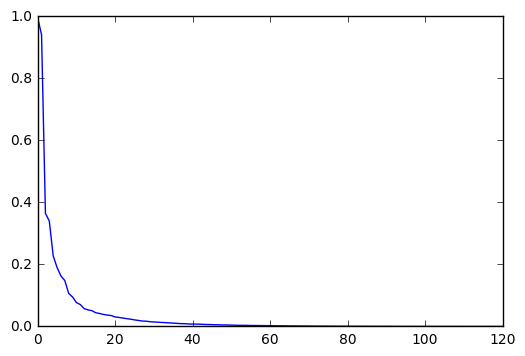

In [23]:
plt.plot(pca.explained_variance_)

Decide how many components to use

[]

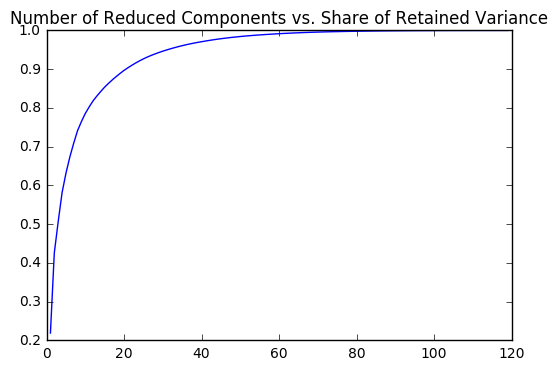

In [30]:
#Plot the total variance that results from reducing to n dimensions
n_comps_to_try = np.arange(1,120).tolist()

#instantiate a list object to hold the total variances
total_variances = []

#instantiate pca object
pca = PCA()

#loop through the number of components to get total variances
for n_comp in n_comps_to_try:
    
    pca = PCA(n_components = n_comp)
    
    #fit and transform  the training data
    X_transformed_reduced = pd.DataFrame(pca.fit_transform(X_train))

    #get the total variance
    reduced_dim_covar = X_transformed_reduced.cov()
    new_total_var = np.trace(reduced_dim_covar)
    
    #append to list
    total_variances.append(new_total_var / total_var)
    
#plot the share of retained variance given the number of dimensions we want to reduce to
plt.figure()

plt.plot(n_comps_to_try, total_variances)
plt.title("Number of Reduced Components vs. Share of Retained Variance")

plt.plot()


#### Method One

Create a new PCA object that is explicity a dimension reducer

As a general rule, want to retain 90% of the total original variance

In [ ]:
#instantiate a new pca object that reduces the dimensionality of the data
pca_dim_reducer = PCA(n_components = 20)

#fit and transform  the training data
X_transformed_reduced = pd.DataFrame(pca_dim_reducer.fit_transform(X_train))

#get the total variance
reduced_dim_covar = X_transformed_reduced.cov()
np.trace(reduced_dim_covar)


#### Method Two

Transform the data using the original PCA, but keep only the first num_comp columns

In [31]:
#instantiate baseline pca
pca = PCA()

X_transformed = pca.fit_transform(X_train)

#take the first 20 columns
X_transformed_reduced = X_transformed[:,:20]

#### Method Three

The key to understanding PCA is the following equation:

$$
\underset{m \times n}M \approx \underset{m \times k}U \times \underset{k \times n}V^T
$$

- $M$ is the original data matrix (as long as each column has zero mean)
- $k$ is the dimension to reduce to
- $U$ maps from rows of M to components
- $V^T$ maps from components to columns of M (features)

In [33]:
M = X_train - X_train.mean()

Vt = pca.components_[:20,:]

U = np.matmul(M, np.transpose(Vt))



### Exercise

The component matrix $V$ tells us the mapping between principal components and the original features. Use this matrix to try to interpret the first two principal components

In [42]:
comp0 = pd.Series(dict(zip(X_train.columns, Vt[0,:])))
comp1 = pd.Series(dict(zip(X_train.columns, Vt[1,:])))


col_order = comp0.sort_values().index
#description of first principal component.
#The first principal component is made up of 0.045  * AsianPerCap + -0.063 * FemalePctDiv + 0.039 * HispPerCap + etc
comp0





AsianPerCap              0.044906
FemalePctDiv            -0.063415
HispPerCap               0.038605
HousVacant              -0.074056
LandArea                -0.041116
LemasGangUnitDeploy     -0.025459
LemasPctOfficDrugUn     -0.020079
LemasPctPolicOnPatr      0.040073
LemasSwFTFieldOps        0.016802
LemasSwFTFieldPerPop    -0.020051
LemasSwFTPerPop         -0.025229
LemasSwornFT            -0.017550
LemasTotReqPerPop       -0.023248
LemasTotalReq           -0.015241
MalePctDivorce          -0.087785
MalePctNevMarr          -0.002897
MedNumBR                -0.020104
MedOwnCostPctInc         0.101635
MedOwnCostPctIncNoMtg   -0.043313
MedRent                  0.142316
MedRentPctHousInc        0.000481
MedYrHousBuilt           0.028130
NumIlleg                -0.070288
NumImmig                 0.058606
NumInShelters           -0.030240
NumKindsDrugsSeiz       -0.002819
NumStreet                0.007369
NumUnderPov             -0.065854
OfficAssgnDrugUnits     -0.015437
OtherPerCap   

For chart below

Each row is an original feature, the graphs shows how much each original feature influences the first and second principal component.



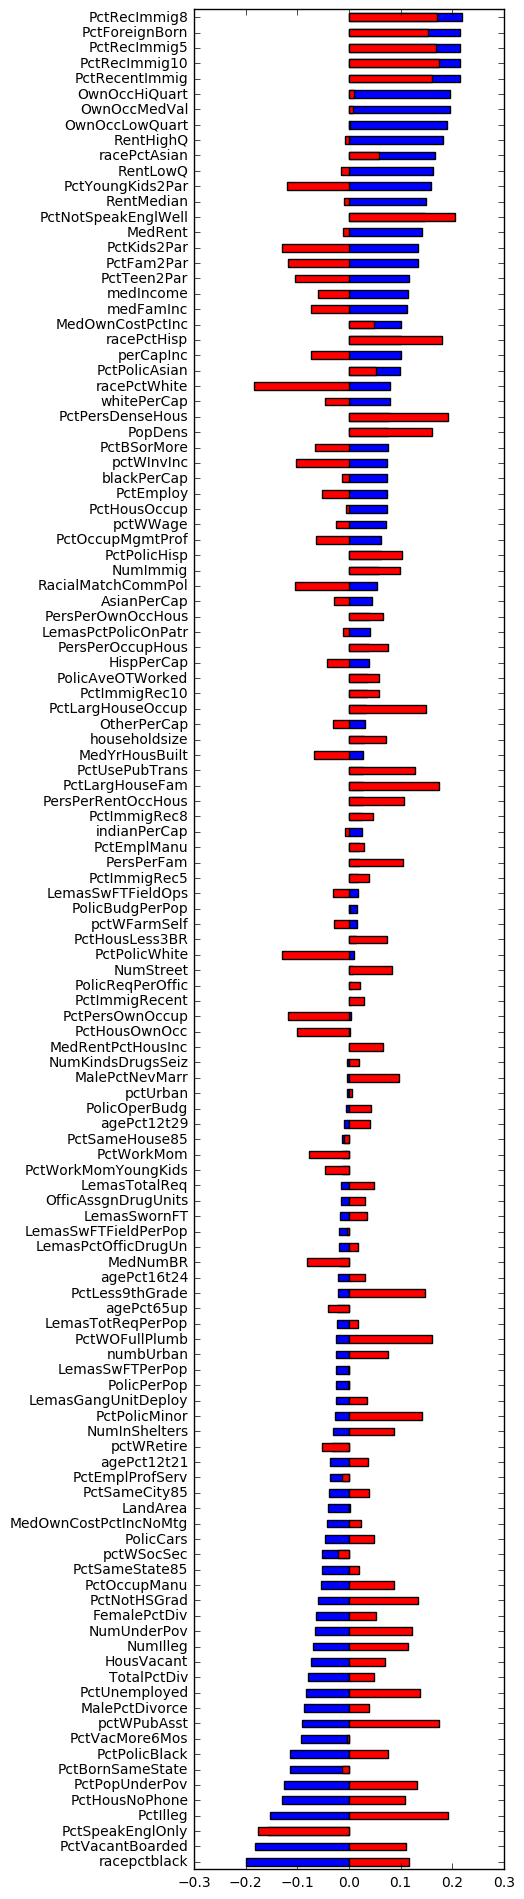

In [44]:
plt.figure(figsize = (4, 24))

comp0[col_order].plot(kind = 'barh', color = 'blue')

comp1[col_order].plot(kind = 'barh', color = 'red')



- The first component ranges from wealthy immigrant neighborhoods, to poor native neighborhoods.
- The second component ranges from poor immigrant neighborhoods to wealthy native neighborhoods.
- These do seem to be orthogonal

## Application: Linear Regression

We tried regularized regression on this dataset before. Let's remind ourselves of the results

#### Vanilla

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test, y_test))

Train R-squared: 0.823
Test R-squared: 0.509


#### Lasso

In [46]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas= 2. ** np.arange(-10, 10))
lasso.fit(X_train, y_train)

print 'Train R-squared: {:.3}'.format(lasso.score(X_train, y_train))
print 'Test R-squared: {:.3}'.format(lasso.score(X_test, y_test))

Train R-squared: 0.661
Test R-squared: 0.722


/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Using Dimensionality Reduction

The reason the un-regularized model does so poorly is that there are way too many features compared to the number of observations. Another approach to regularization is simply to choose a smaller number of features.

## Exercise

Below are three approaches to reducing the number of features used in the model. For each approach, 

1. Plot the R-squared (on X_test) vs number of features used.
2. Report the best R-squared
3. Report the number of features used to get the best R-squared

#### 1. Randomly choose subsets of features

This is the most naive approach to dimensionality reduction; just pick $k$ original features at random.

In [60]:
#pick first 20 features
X_train_new = X_train.iloc[:,40:60]
X_test_new = X_test.iloc[:,40:60]

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train_new, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test_new, y_test))

Train R-squared: 0.627
Test R-squared: 0.649


#### 2. Intelligently choose subsets of features

We can do a little better than randomly choosing sets of features. Use the sklearn function `f_regression` to rank the features in order of their correlation with the target, then pick the top $k$ features.

In [69]:
?f_regression()

In [73]:
type(f_reg[1])

numpy.ndarray

In [79]:
from sklearn.feature_selection import f_regression

#instantiate classifier
f_reg = f_regression(X_train, y_train)

p_values = f_reg[1]

#want indices of the smallest p values
min_values_indices = p_values.argsort()[:20]

min_values_indices

#pick the 20 features with the lowest p-value from the f_regression function
X_train_new = X_train.iloc[:,min_values_indices]
X_test_new = X_test.iloc[:,min_values_indices]

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train_new, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test_new, y_test))



Train R-squared: 0.628
Test R-squared: 0.666


#### 3. Intelligently choose a projections into principal component space

Lastly, we can use PCA to compress as much information into as few features as possible. The number of features to use is the number of principal components.

In [80]:
#instantiate new pca object
pca = PCA()

#create transformed train and test
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train_new, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test_new, y_test))

#With PCA and no dimensionality reduction, confirm we get the same results as with no PCA


Train R-squared: 0.823
Test R-squared: 0.509


In [81]:
#instantiate new pca object
pca = PCA(n_components = 20)

#create transformed train and test
X_train_new = pca.fit_transform(X_train)
X_test_new = pca.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train_new, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test_new, y_test))


Train R-squared: 0.644
Test R-squared: 0.73


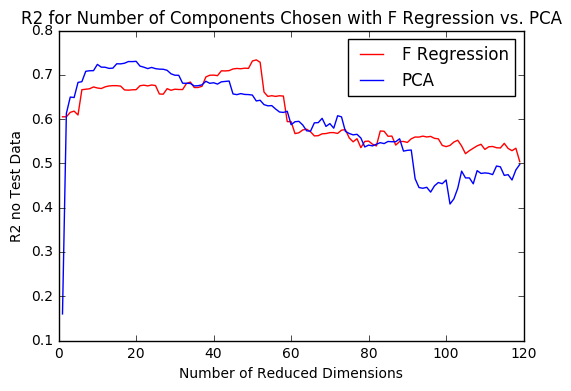

In [90]:
#plot test R squared for PCA dimensionality reduction vs F-reg dimensionality reduction

#create a list of components to keep
n_comps_to_try = np.arange(1, 120).tolist()

#create a list to hold R2 for F-reg and PCA
R2_list_freg = []
R2_list_pca = []

for n_comp in n_comps_to_try:

    #***********
    #freg
    
    #want indices of the smallest p values
    min_values_indices = p_values.argsort()[:n_comp]

    #pick the 20 features with the lowest p-value from the f_regression function
    X_train_new = X_train.iloc[:,min_values_indices]
    X_test_new = X_test.iloc[:,min_values_indices]

    lr = LinearRegression()
    lr.fit(X_train_new, y_train)
    
    #get F-reg R2
    R2_list_freg.append(lr.score(X_test_new, y_test))
    
    
    #***********
    #PCA

    #instantiate new pca object
    pca = PCA(n_components = n_comp)

    #create transformed train and test
    X_train_new_2 = pca.fit_transform(X_train)
    X_test_new_2 = pca.transform(X_test)

    lr2 = LinearRegression()
    lr2.fit(X_train_new_2, y_train)

    R2_list_pca.append(lr2.score(X_test_new_2, y_test))
    
    
#Plot the results
plt.figure()

plt.plot(n_comps_to_try, R2_list_freg, color = 'red', label = "F Regression")
plt.plot(n_comps_to_try, R2_list_pca, color = 'blue', label = "PCA")
plt.legend()
plt.title("R2 for Number of Components Chosen with F Regression vs. PCA")
plt.xlabel("Number of Reduced Dimensions")
plt.ylabel("R2 no Test Data")
plt.show()




## Bonus: Kernel PCA

### Exercise

Instead of vanilla PCA, try using a nonlinear kernel. See if you can find kernel parameters that improve the regression model.

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV